# Data Analysis and Regression
# HW 4 Solution
---

In [37]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

if not os.path.exists('./figures'):
    os.mkdir('./figures')

## Problem 1

In [38]:
import numpy as np
np.random.seed(42)
mean = [0, 0, 0]
cov = [[1, 0.9, 0.7], [0.9, 1, 0.8], [0.7, 0.8, 1]]
X = np.random.multivariate_normal(mean, cov, 500)

### 1.1

In [ ]:
X_demeaned = X - np.mean(X, axis=0)
covX = 1/499 * X_demeaned.T @ X_demeaned
eigenvalues, eigenvectors = np.linalg.eig(covX)

order = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[order]
eigenvectors = eigenvectors[:, order]

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [2.29077816 0.31300638 0.08782584]
Eigenvectors:
 [[-0.5859901  -0.57125653 -0.57470129]
 [-0.60499383 -0.16338781  0.77928614]
 [-0.53907148  0.8043447  -0.24986304]]


### 1.2

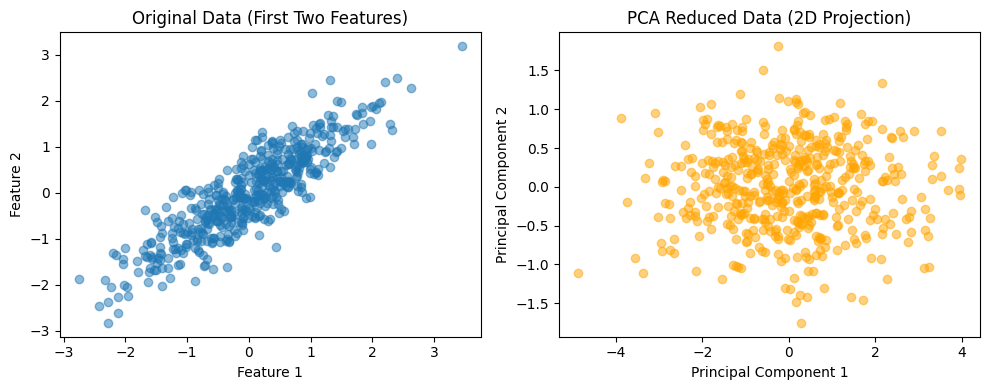

In [43]:
X_pca = X_demeaned @ eigenvectors[:, :2]

fig, ax = plt.subplots(1,2 , figsize = (10, 4))
ax[0].scatter(X_demeaned[:, 0], X_demeaned[:, 1], alpha=0.5)
ax[0].set_title('Original Data (First Two Features)')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, color='orange')
ax[1].set_title('PCA Reduced Data (2D Projection)')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')
plt.tight_layout()
fig.savefig("./figures/problem1_pca_projection.png", dpi=300, bbox_inches='tight')

### 1.3

In [45]:
X_pca = PCA().fit(X)

In [48]:
X_pca.components_

array([[ 0.5859901 ,  0.60499383,  0.53907148],
       [-0.57125653, -0.16338781,  0.8043447 ],
       [ 0.57470129, -0.77928614,  0.24986304]])

In [7]:
X_pca.explained_variance_

array([2.29077816, 0.31300638, 0.08782584])

## Problem 2
### 2.1

In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.decomposition import PCA

np.random.seed(42)
n = 500

X_high_var = np.random.normal(0, 10, (n, 7))
X_low_var = np.random.normal(0, 1, (n, 3))
X = np.hstack([X_high_var, X_low_var])

true_beta = np.array([0]*7 + [2, -2, 2])
y = X @ true_beta + np.random.normal(0, 0.5, n)

In [9]:
X_pca = PCA().fit(X)
X_pca.explained_variance_ratio_

array([0.16772843, 0.16159361, 0.15786878, 0.14254598, 0.12969401,
       0.12647038, 0.10982575, 0.00148884, 0.00142307, 0.00136117])

### 2.2

In [10]:
model_pcr = sm.OLS(y, X_pca.transform(X)[:, :7]).fit()
print(model_pcr.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        y         & \textbf{  R-squared (uncentered):}      &     0.006   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared (uncentered):} &    -0.008   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       }          &    0.4548   \\
\textbf{Date:}             & Tue, 23 Dec 2025 & \textbf{  Prob (F-statistic):}          &    0.867    \\
\textbf{Time:}             &     17:57:34     & \textbf{  Log-Likelihood:    }          &   -1334.3   \\
\textbf{No. Observations:} &         500      & \textbf{  AIC:               }          &     2683.   \\
\textbf{Df Residuals:}     &         493      & \textbf{  BIC:               }          &     2712.   \\
\textbf{Df Model:}         &           7      & \textbf{                     }          &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     }          &             \\
\bottomru

### 2.3

In [11]:
X_demeaned = X - np.mean(X, axis=0)
model = sm.OLS(y, X_demeaned).fit()
print(model.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        y         & \textbf{  R-squared (uncentered):}      &     0.980   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared (uncentered):} &     0.980   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       }          &     2392.   \\
\textbf{Date:}             & Tue, 23 Dec 2025 & \textbf{  Prob (F-statistic):}          &     0.00    \\
\textbf{Time:}             &     17:57:34     & \textbf{  Log-Likelihood:    }          &   -358.89   \\
\textbf{No. Observations:} &         500      & \textbf{  AIC:               }          &     737.8   \\
\textbf{Df Residuals:}     &         490      & \textbf{  BIC:               }          &     779.9   \\
\textbf{Df Model:}         &          10      & \textbf{                     }          &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     }          &             \\
\bottomru

## Problem 3

In [12]:
import pandas as pd
np.random.seed(42)
n_points = 500
grid_size = 4
limit = 10
step = (limit * 2) / grid_size

all_points = []
all_labels = []

for i in range(grid_size):
    for j in range(grid_size):
        label = (i + j) % 2
        x_min, x_max = -limit + i * step, -limit + (i + 1) * step
        y_min, y_max = -limit + j * step, -limit + (j + 1) * step
        points_x = np.random.uniform(x_min, x_max, int(n_points/16))
        points_y = np.random.uniform(y_min, y_max, int(n_points/16))
        all_points.append(np.vstack((points_x, points_y)).T)
        all_labels.extend([label] * int(n_points/16))

X = np.vstack(all_points)
y = np.array(all_labels)

### 3.1, 3.2

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

class BaggingDTC:
    def __init__(self, B=100):
        self.B = B
        self.trees = []
    
    def fit(self, X, y):
        n_samples = X.shape[0]
        for b in range(self.B):
            indices = np.random.choice(n_samples, size=n_samples, replace=True)
            X_bag = X[indices]
            y_bag = y[indices]
            tree = DecisionTreeClassifier(max_depth=5, random_state=42)
            tree.fit(X_bag, y_bag)
            self.trees.append(tree)
    
    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        majority_votes = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)
        return majority_votes



In [14]:
dtc = DecisionTreeClassifier(max_depth = None, random_state=42)
dtc.fit(X, y)

dtc_bag = BaggingDTC(B=100)
dtc_bag.fit(X, y)

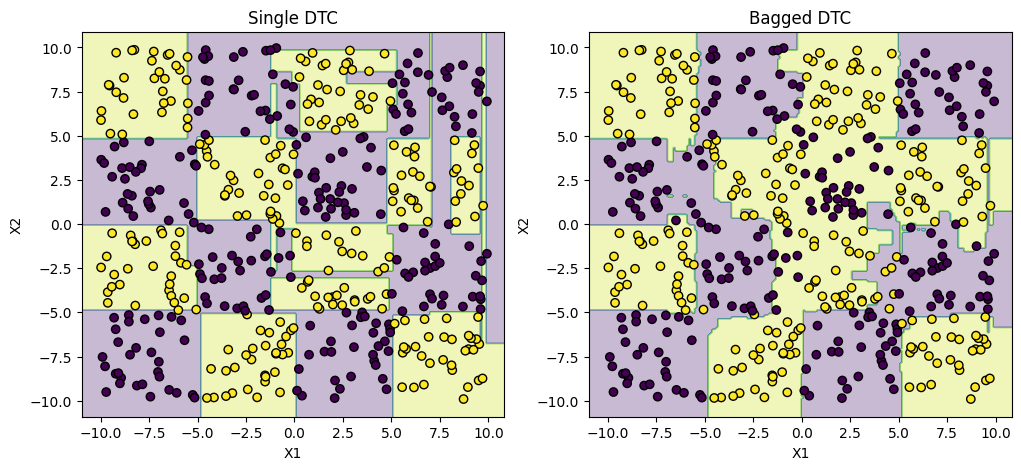

In [15]:
def plot_decision_boundary(model, X, y, ax, title='Decision Boundary'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title(title)
    return ax

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(dtc, X, y, ax[0], title='Single DTC')
plot_decision_boundary(dtc_bag, X, y, ax[1], title='Bagged DTC')
fig.savefig("./figures/problem3_bagging_comparison.png", dpi=300, bbox_inches='tight')

## Problem 4

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
# y is exponential, which OLS struggles with
y = np.exp(X.ravel() / 3) + np.random.normal(0, 0.5, 100)

### 4.1

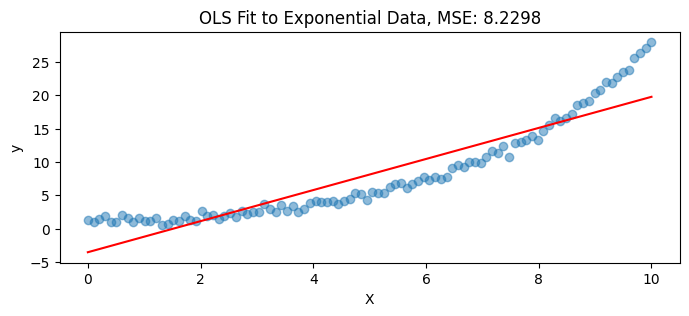

In [17]:
ols = sm.OLS(y, sm.add_constant(X)).fit()
mse = np.mean(ols.resid**2)

fig, ax = plt.subplots(figsize=(8, 3))
ax.scatter(X, y, label='Data', alpha=0.5)
ax.plot(X, ols.fittedvalues, color='red', label='OLS Prediction')
ax.set_title('OLS Fit to Exponential Data, MSE: {:.4f}'.format(mse))
ax.set_xlabel('X')
ax.set_ylabel('y')
fig.savefig("./figures/problem4_ols_fit.png", dpi=300, bbox_inches='tight')

### 4.2

In [18]:
pred = ols.fittedvalues.copy()
eta = 0.1
for _ in range(50):
    resid_n = y - pred
    tree = DecisionTreeRegressor(max_depth=1).fit(X, resid_n)
    pred += eta * tree.predict(X)

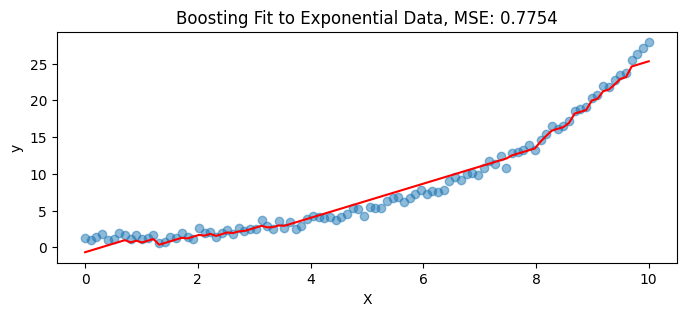

In [19]:
resid_final = y - pred
mse_final = np.mean(resid_final**2)

fig, ax = plt.subplots(figsize=(8, 3))
ax.scatter(X, y, label='Data', alpha=0.5)
ax.plot(X, pred, color='red', label='Boosting Prediction')
ax.set_title('Boosting Fit to Exponential Data, MSE: {:.4f}'.format(mse_final))
ax.set_xlabel('X')
ax.set_ylabel('y')
fig.savefig("./figures/problem4_boosting_fit.png", dpi=300, bbox_inches='tight')

## Problem 5

In [20]:
import pandas as pd
np.random.seed(42)
n_points = 500
grid_size = 4
limit = 10
step = (limit * 2) / grid_size

all_points = []
all_labels = []

for i in range(grid_size):
    for j in range(grid_size):
        label = (i + j) % 2
        x_min, x_max = -limit + i * step, -limit + (i + 1) * step
        y_min, y_max = -limit + j * step, -limit + (j + 1) * step
        points_x = np.random.uniform(x_min, x_max, int(n_points/16))
        points_y = np.random.uniform(y_min, y_max, int(n_points/16))
        all_points.append(np.vstack((points_x, points_y)).T)
        all_labels.extend([label] * int(n_points/16))

X = np.vstack(all_points)
y = np.array(all_labels)

### 5.1

In [21]:
length = X.shape[0]
train_ind = np.random.choice(range(length), size=int(length * 0.7), replace=False)
X_train, y_train = X[train_ind], y[train_ind]
X_test, y_test = np.delete(X, train_ind, axis=0), np.delete(y, train_ind, axis=0)

In [22]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rfc.fit(X_train, y_train)

abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=50, learning_rate=0.1, random_state=42)
abc.fit(X_train, y_train)

/Users/younghunlee/miniconda3/envs/hun/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, random_state=42)

In [33]:
def get_accuracy(model, X, y):
    preds = model.predict(X)
    return np.mean(preds == y)

In [34]:
a, b = get_accuracy(rfc, X_test, y_test), get_accuracy(abc, X_test, y_test)
print(f"Random Forest Accuracy: {a:.4f}")
print(f"AdaBoost Accuracy: {b:.4f}")

Random Forest Accuracy: 0.8926
AdaBoost Accuracy: 0.9128


## Problem 6

In [25]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X_moons, y = make_moons(n_samples=300, noise=0.05)

### 6.1

In [26]:
def cdist(a, b):
    return np.sqrt(((a[:, np.newaxis, :] - b[np.newaxis, :, :]) ** 2).sum(axis=2))

eps = 0.2
min_pts = 5
labels = np.full(X_moons.shape[0], -2) # -2: unvisited, -1: noise
cluster_id = -1
dists = cdist(X_moons, X_moons)

for i in range(len(X_moons)):
    if labels[i] != -2: continue
    neighbors = np.where(dists[i] < eps)[0]
    if len(neighbors) < min_pts:
        labels[i] = -1
    else:
        cluster_id += 1
        labels[i] = cluster_id
        queue = list(neighbors)
        while queue:
            q = queue.pop(0)
            if labels[q] != -2: continue # if already assigned to a cluster, skip
            labels[q] = cluster_id  # assign
            q_neighbors = np.where(dists[q] < eps)[0]
            if len(q_neighbors) >= min_pts:
                queue.extend(q_neighbors)

### 6.2

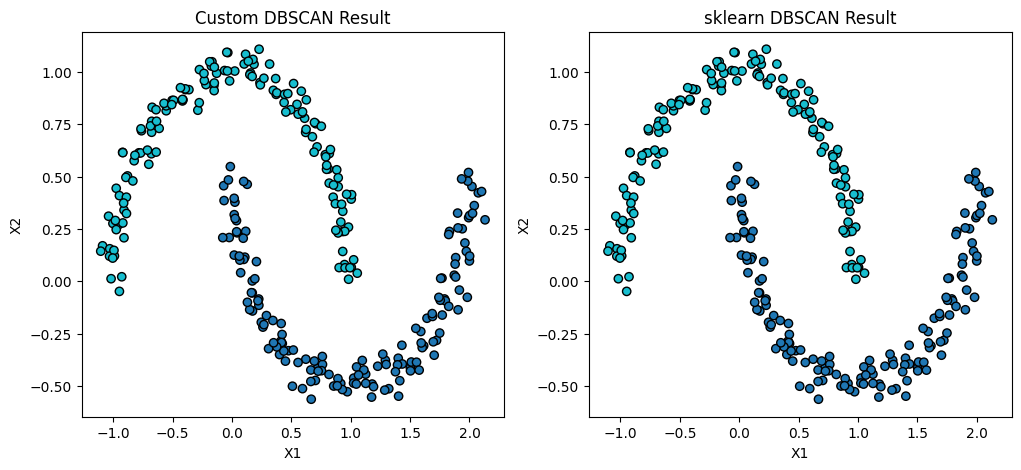

In [27]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X_moons)
labels_sklearn = dbscan.labels_

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
scatter1 = ax[0].scatter(X_moons[:, 0], X_moons[:, 1], c=labels, cmap='tab10', edgecolors='k')
ax[0].set_title('Custom DBSCAN Result')
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')
scatter2 = ax[1].scatter(X_moons[:, 0], X_moons[:, 1], c=labels_sklearn, cmap='tab10', edgecolors='k')
ax[1].set_title('sklearn DBSCAN Result')
ax[1].set_xlabel('X1')
ax[1].set_ylabel('X2')
fig.savefig("./figures/problem6_dbscan_comparison.png", dpi=300, bbox_inches='tight')